In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [297]:
%matplotlib inline

In [298]:
file_name = 'data1.xlsx'

In [299]:
data = pd.ExcelFile(file_name)

In [300]:
print(type(data))

<class 'pandas.io.excel.ExcelFile'>


In [301]:
print(data.sheet_names)

['WinPos']


In [302]:
df = data.parse('WinPos')

In [303]:
print(df)

      27.333466   0.292208 
0     27.334021    0.308442
1     27.334577    0.292208
2     27.335133    0.292208
3     27.335688    0.292208
4     27.336244    0.292208
5     27.336799    0.292208
6     27.337355    0.292208
7     27.337910    0.292208
8     27.338466    0.292208
9     27.339021    0.292208
10    27.339577    0.275974
11    27.340133    0.275974
12    27.340688    0.292208
13    27.341244    0.292208
14    27.341799    0.292208
15    27.342355    0.292208
16    27.342910    0.275974
17    27.343466    0.275974
18    27.344021    0.259740
19    27.344577    0.292208
20    27.345133    0.292208
21    27.345688    0.292208
22    27.346244    0.292208
23    27.346799    0.275974
24    27.347355    0.292208
25    27.347910    0.292208
26    27.348466    0.308442
27    27.349021    0.292208
28    27.349577    0.292208
29    27.350133    0.275974
...         ...         ...
1365  28.092355 -176.704550
1366  28.092910 -176.655841
1367  28.093466 -176.672077
1368  28.094021 -176

чтение внутри открытой конструкции. при закрытии программы файл закрывается

In [304]:
with open(file_name , 'r') as f:
    data_table = pd.read_excel(file_name, index_col = None, header = None)

In [305]:
print(type(data_table))

<class 'pandas.core.frame.DataFrame'>


In [306]:
print(data_table.shape)

(1396, 2)


In [307]:
print(data_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 2 columns):
0    1396 non-null float64
1    1396 non-null float64
dtypes: float64(2)
memory usage: 21.9 KB
None


In [308]:
print(data_table.iloc[:, :2])

              0           1
0     27.333466    0.292208
1     27.334021    0.308442
2     27.334577    0.292208
3     27.335133    0.292208
4     27.335688    0.292208
5     27.336244    0.292208
6     27.336799    0.292208
7     27.337355    0.292208
8     27.337910    0.292208
9     27.338466    0.292208
10    27.339021    0.292208
11    27.339577    0.275974
12    27.340133    0.275974
13    27.340688    0.292208
14    27.341244    0.292208
15    27.341799    0.292208
16    27.342355    0.292208
17    27.342910    0.275974
18    27.343466    0.275974
19    27.344021    0.259740
20    27.344577    0.292208
21    27.345133    0.292208
22    27.345688    0.292208
23    27.346244    0.292208
24    27.346799    0.275974
25    27.347355    0.292208
26    27.347910    0.292208
27    27.348466    0.308442
28    27.349021    0.292208
29    27.349577    0.292208
...         ...         ...
1366  28.092355 -176.704550
1367  28.092910 -176.655841
1368  28.093466 -176.672077
1369  28.094021 -176

In [309]:
data_x = data_table.iloc[:, :1]
data_t = data_table.iloc[:, 1:2]

In [310]:
x = np.array(data_table[1])
time = np.array(data_table[0])

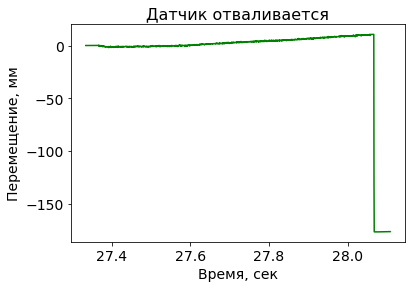

In [311]:
sqr2 = time
sqr1= x
fig,ax = plt.subplots()
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Датчик отваливается', fontsize = 16)
ax.set_xlabel('Время, сек', fontsize = 14)
ax.set_ylabel('Перемещение, мм', fontsize = 14)
ax.plot(sqr2, sqr1, 'r', color = 'green', markersize=0.5)
plt.show()

In [312]:
sqr2 = time[:-75]
sqr1 = x[:-75]
print(sqr1,sqr2)

[  0.29220779   0.30844156   0.29220779 ...,  10.86038947  10.86038947
  10.86038947] [ 27.33346585  27.3340214   27.33457696 ...,  28.06568807  28.06624363
  28.06679918]


[ 27.33346585  27.3340214   27.33457696 ...,  28.06568807  28.06624363
  28.06679918]


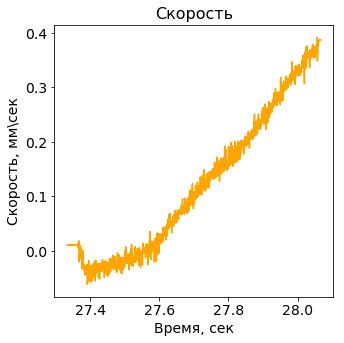

In [313]:
def v(arr1,arr2):
    V = []
    for i in range(len(arr1)):
        V.append(arr1[i]/arr2[i])
    return V

v1 = v(sqr1, sqr2)
print(sqr2)
fig,ax = plt.subplots(figsize = (5,5))
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Скорость', fontsize = 16)
ax.set_xlabel('Время, сек', fontsize = 14)
ax.set_ylabel('Скорость, мм\сек', fontsize = 14)
ax.plot(sqr2,v1, 'r', color = 'orange', markersize=0.5)
plt.show()

In [314]:
def average(arr, N):
    length = len(arr)
    res = np.zeros(length)
    if N%2 == 0:
        di = 1 
    else: di = 0
    for i in range(length):
        min_i = i - int(N/2)
        max_i = i + int(N/2)
        res[i] = np.average(arr[max(min_i, 0) : min(max_i + di, length + 1)])
    return res

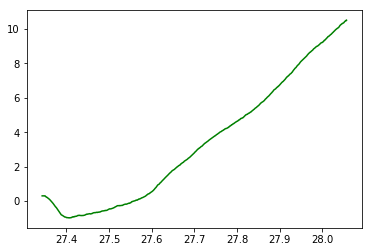

In [315]:
av1 = average(sqr1, 75)
av2 = average(sqr2, 75)
v1 = v(av1, av2)
fig,ax = plt.subplots()
ax.plot(av2, av1, color = 'green', markersize=2)
plt.show()

[ 27.34346585  27.34374363  27.3440214  ...,  28.05596585  28.05624363
  28.0565214 ]


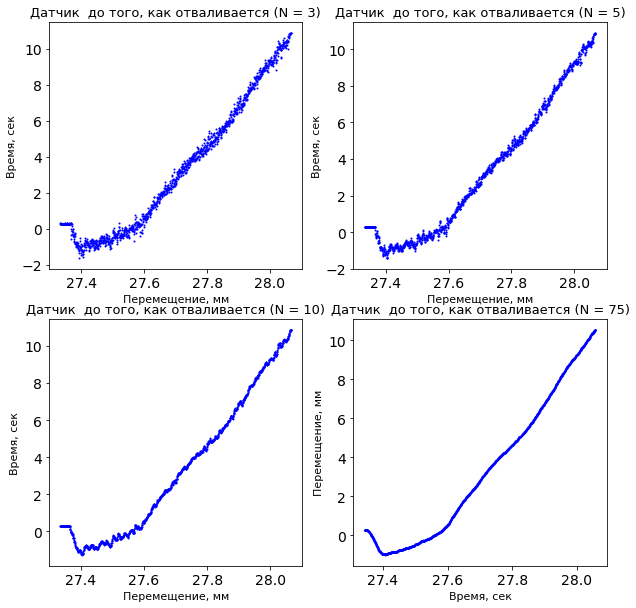

In [316]:
fig,ax = plt.subplots(2,2, figsize = (10,10))
ax[0][0].tick_params(axis = 'both', labelsize = 14)
ax[0][0].set_title('Датчик  до того, как отваливается (N = 3)', fontsize = 13)
ax[0][0].set_xlabel('Перемещение, мм', fontsize = 11)
ax[0][0].set_ylabel('Время, сек', fontsize = 11)
ax[0][0].plot(average(sqr2, 3), average(sqr1, 3), 'ro', color = 'blue', markersize=1)

ax[0][1].tick_params(axis = 'both', labelsize = 14)
ax[0][1].set_title('Датчик  до того, как отваливается (N = 5)', fontsize = 13)
ax[0][1].set_xlabel('Перемещение, мм', fontsize = 11)
ax[0][1].set_ylabel('Время, сек', fontsize = 11)
ax[0][1].plot( average(sqr2, 5),average(sqr1, 5), 'ro', color = 'blue', markersize=1)

ax[1][0].tick_params(axis = 'both', labelsize = 14)
ax[1][0].set_title('Датчик  до того, как отваливается (N = 10)', fontsize = 13)
ax[1][0].set_xlabel('Перемещение, мм', fontsize = 11)
ax[1][0].set_ylabel('Время, сек', fontsize = 11)
ax[1][0].plot( average(sqr2, 10),average(sqr1, 10), 'ro', color = 'blue', markersize=1)

ax[1][1].tick_params(axis = 'both', labelsize = 14)
ax[1][1].set_title('Датчик  до того, как отваливается (N = 75)', fontsize = 13)
ax[1][1].set_xlabel('Время, сек', fontsize = 11)
ax[1][1].set_ylabel('Перемещение, мм', fontsize = 11)
ax[1][1].plot( average(sqr2, 75),average(sqr1, 75), 'ro', color = 'blue', markersize=1)
print(average(sqr2, 75))

plt.show() 

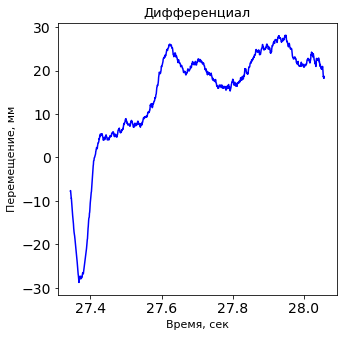

In [317]:
time=average(sqr2, 75)
data=average(sqr1, 75)


def diff(X,Y):
    D=np.zeros(len(Y))
    for i in range(len(Y)-1):
        D[i]=((Y[i+1]-Y[i])/(X[i+1]-X[i]))
    return D


fig,ax = plt.subplots(figsize = (5,5))    
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title('Дифференциал', fontsize = 13)
ax.set_xlabel('Время, сек', fontsize = 11)
ax.set_ylabel('Перемещение, мм', fontsize = 11)
ax.plot(time, average(diff(time,data), 75), 'r', color = 'blue', markersize=1)        
        

In [318]:
def model(X,k):
    M=np.zeros((k+1,(len(X))))
    for i in range(len(X)):
        for j in range(k,-1,-1):
            M[j][i]=X[i]**(j)
    M = M.T
    M1 = np.zeros((len(X),k))
    for i in range(len(X)):
        for j in range(k):
            M1[len(X)-1-i][k-1-j] = M[i][j]
    return M1


def model1(X,k,Y):
    M = []
    for i in range(k+1):
        M.append(X**(k-i))
    M = np.vstack(M).T
    A=np.dot(np.linalg.inv(np.dot(M.T,M)),np.dot(M.T,Y))
    return A
    
    
# M=model1(time,3,data)
x1 = np.arange(5)+2
y1 = np.array(x1**2)+1
# print(x, y)
A = model1(x1,3,y1)

In [332]:
import sympy as sp
x = sp.symbols('x') 
def mnk(A, arg):
    f=np.zeros(len(A))
    res=0
    for coef in list(A):
        res = res*x+coef
    print(res)
    F = []
    for i in (list(arg)):
        F.append(res.subs(x,i))     
    return F

A = model1(time, 3, data)
f=mnk(A,time)


x*(x*(-43.373514175415*x + 3624.94357299805) - 100961.421875) + 937108.625


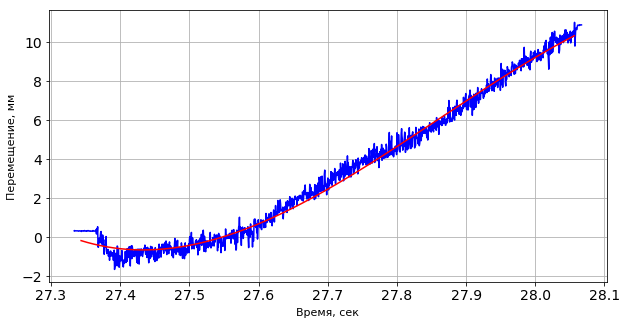

In [320]:
fig,ax = plt.subplots(figsize = (10,5))    
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title(' ', fontsize = 13)
ax.set_xlabel('Время, сек', fontsize = 11)
ax.set_ylabel('Перемещение, мм', fontsize = 11)
ax.grid()
ax.plot(sqr2,sqr1, 'r', color = 'blue', markersize=1) 
ax.plot(time, f, 'r', color = 'red', markersize=1)


In [321]:
def sco(k,X,Y):
    e=[]
    summ = 0
    for i in range(1,k+1):
        summ = (Y - mnk(model1(X,i,Y), X)) **2
        e.append(np.sum(summ))
    print(e)
    return e

[1093.06474300729, 207.128683238023, 68.3637282268770, 1175.88596817978]


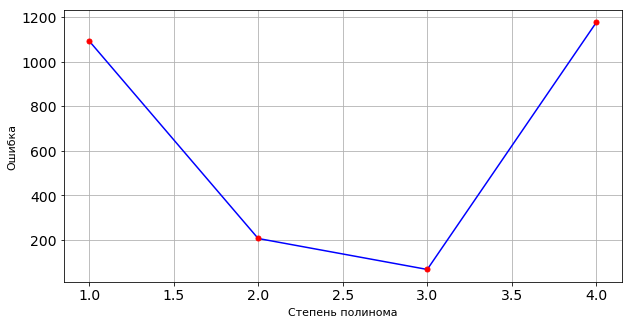

In [322]:
s=sco(4,time,data)
num=np.arange(1,len(s)+1)
fig,ax = plt.subplots(figsize = (10,5))    
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title(' ', fontsize = 13)
ax.set_xlabel('Степень полинома', fontsize = 11)
ax.set_ylabel('Ошибка', fontsize = 11)
ax.grid()
ax.plot( num, s, 'r', color = 'blue', markersize=1) 
ax.plot( num, s, 'ro', color = 'red', markersize=5) 

In [323]:
def opt(X, Y):
    k = 0
    min0 =  np.sum((Y - mnk(model1(X,0,Y), X)) **2)
    min1 = np.sum((Y - mnk(model1(X,1,Y), X)) **2)
    while min1 < min0:
        k += 1
        min0 =  np.sum((Y - mnk(model1(X,k,Y), X)) **2)
        min1 = np.sum((Y - mnk(model1(X,k+1,Y), X)) **2)
    print('Оптимальная степень полинома:  ', k)
    return(k)

In [324]:
n=opt(time, data)

Оптимальная степень полинома:   3


In [325]:
dY=[]
dX=[]
X = np.array(np.arange(1,6))
for i in range (5):
        dY.append(X[i]-X[i-1])
        dX.append(1+i**2)
        print(dY[i]/dX[i])

-4.0
0.5
0.2
0.1
0.0588235294118


In [367]:
time

array([ 27.34346585,  27.34374363,  27.3440214 , ...,  28.05596585,
        28.05624363,  28.0565214 ])

In [339]:
def poly(k,X,Y):
    dY=np.zeros(len(X))
    dX=np.zeros(len(X))
    V=np.zeros(len(X))
    for i in range (len(X)-1):
        dY[i]=(Y[i+1]-Y[i])
        dX[i]=(X[i+1]-X[i])
        V[i] = ((dY[i]/dX[i]))
    dY[len(X)-1]=(Y[len(X)-1]-Y[len(X)-2])
    dX[len(X)-1]=(X[len(X)-1]-X[len(X)-2])    
    V[len(X)-1]=((dY[len(X)-1]/dX[len(X)-1]))
    return(V)
dP=poly(n,time,f)       

In [365]:
z1 = f[1]- f[0]
z2 = time[1]-time[0]

In [366]:
z1/z2

-10.9533281529417

In [370]:
-130.12054253*27.34346585*27.34346585 +    7249.887146*27.34346585 - 100961.421875 

-10.971937433045241

x*(-130.120542526245*x + 7249.88714599609) - 100961.421875


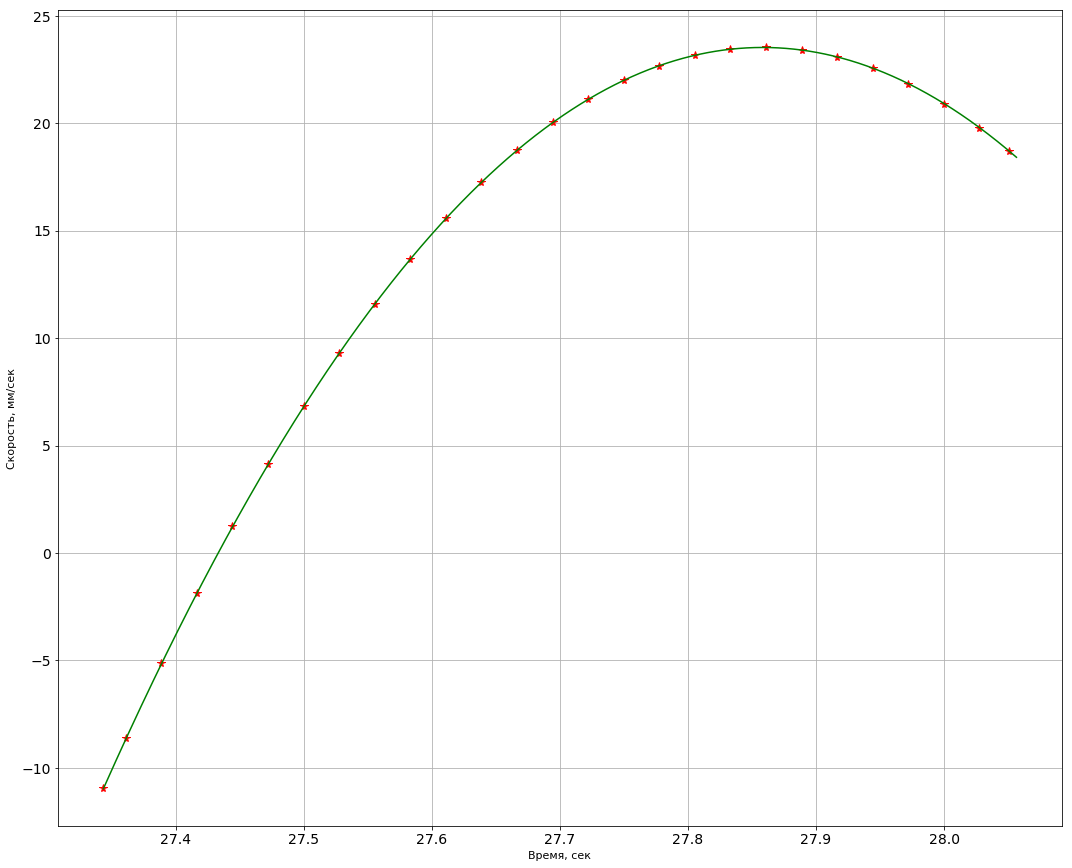

In [377]:
der = np.polyder(A) 

fig,ax = plt.subplots(figsize = (18,15))    
ax.tick_params(axis = 'both', labelsize = 14)
ax.set_title(' ', fontsize = 13)
ax.set_xlabel('Время, сек', fontsize = 11)
ax.set_ylabel('Скорость, мм/сек', fontsize = 11)
ax.grid()
ax.plot( time[::50], dP[::50], '*k', color = 'red', markersize=8) 
ax.plot( time,mnk(der,time), 'r', color = 'green', markersize=1) 
#ax.plot( time,dP, 'r', color = 'blue', markersize=1) 

In [373]:
np.shape(time)

(1321,)